#### Гипотеза 1: Чем ближе страна находится к экваториальному тропическому поясу, тем песня более веселая и энергичная(мы взяли для анализа к-т оптимизма)
Первая гипотеза самая сложная для анализа. Для нее требуется составление отдельного параметра, такого как коэффициент оптимизма. Он определяется как сумма показателей темп, энергичность, танцевальность, валентность. Так же в ДФ нужно добавить, в каком климатическом поясе находится страна.

Здесь наметим план: составить новую табличку, где будут 3 столбца: 1 столбец со странами, второй столбец мо значением к-та оптимизма, 3 столбец с климатическим поясом. Далее в планах сгруппировать страны по климатическим поясам, построить графики для каждого климат пояса(гистограмма от 1 переменной), объединить их и далее будет видно, была ли гипотеза правдива или же нет.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### Гипотеза 2: чем ниже в стране температура, тем более спокойную(тихую) музыку люди предпочитают слушать(параметр громкость, живость и длительность)
По сути, это удаленность от экватора, хоть и с некоторыми поправками. 

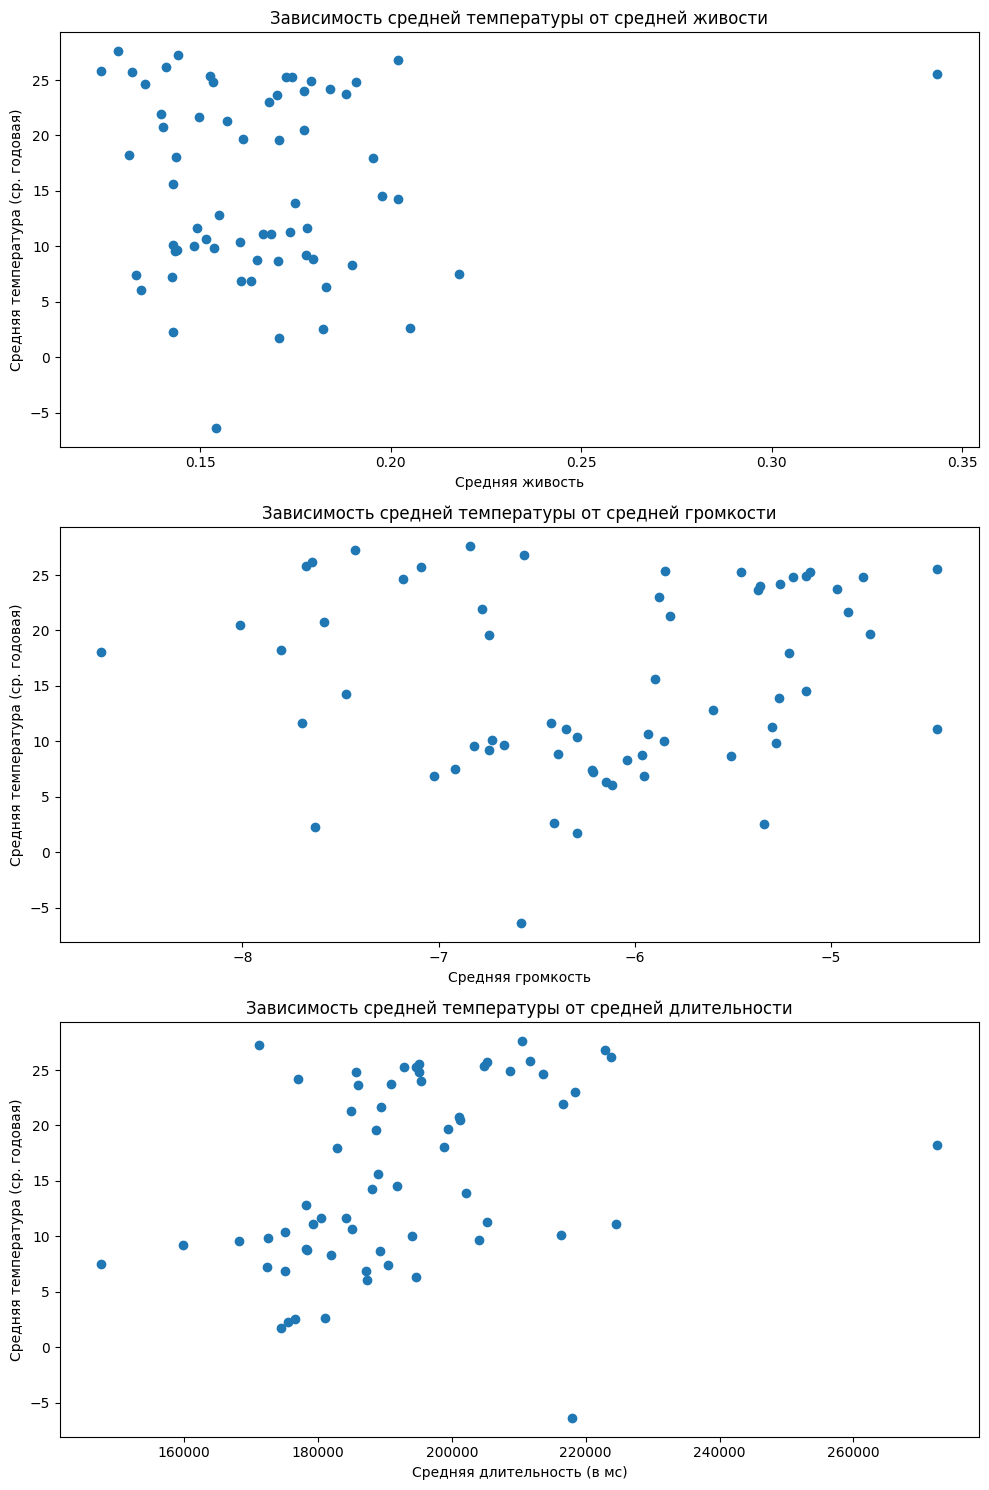

In [17]:


# Загрузка данных
df = pd.read_excel('DataFrame_Spotify (2).xlsx', engine='openpyxl')

# Группировка данных по странам и расчет средних значений
grouped_data = df.groupby('Страны').agg(
    Средняя_живость=pd.NamedAgg(column='Живость', aggfunc='mean'),
    Средняя_громкость=pd.NamedAgg(column='Громкость', aggfunc='mean'),
    Средняя_длительность=pd.NamedAgg(column='Длительность', aggfunc='mean'),
    Средняя_температура=pd.NamedAgg(column='Температура (ср. годовая)', aggfunc='mean')  # assuming temperature is constant per country in dataset
)
grouped_data.reset_index(inplace=True)

# Создание гистограмм для зависимостей
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Зависимость средней температуры от средней живости
axs[0].scatter(grouped_data['Средняя_живость'], grouped_data['Средняя_температура'])
axs[0].set_title('Зависимость средней температуры от средней живости')
axs[0].set_xlabel('Средняя живость')
axs[0].set_ylabel('Средняя температура (ср. годовая)')

# Зависимость средней температуры от средней громкости
axs[1].scatter(grouped_data['Средняя_громкость'], grouped_data['Средняя_температура'])
axs[1].set_title('Зависимость средней температуры от средней громкости')
axs[1].set_xlabel('Средняя громкость')
axs[1].set_ylabel('Средняя температура (ср. годовая)')

# Зависимость средней температуры от средней длительности
axs[2].scatter(grouped_data['Средняя_длительность'], grouped_data['Средняя_температура'])
axs[2].set_title('Зависимость средней температуры от средней длительности')
axs[2].set_xlabel('Средняя длительность (в мс)')
axs[2].set_ylabel('Средняя температура (ср. годовая)')

plt.tight_layout()
plt.show()




Из данных мы можем сделать вывод, что в случае с длительностью:
в холодных странах(температура ниже 5 градусов) треки достаточно короткие
в странах со средней температурой от 5 до 13 градусов достаточно большой разброс значений, оценить что либо сложно
и в жарких странах треки в среднем длиннее, чем в холодныхъ, видимо, люди любят повеселиться :)

В случае средней громкости если построить тренд(в будущем сделаем), то увидим, что в среднем чем больше температура, тем больше длительность трека.

Анализ средней живости же не дал практически никаких результатов. По данным в среднем живость примерно одинакова как в хл+олодных, так и в горячих странах. 

Отсюда делаем вывод, что изначальная гипотеза частично верна. Действительно, громкость выше в жарких странах, как и длительность. А вот по живости не все так ясно :(

#### Гипотеза 3: В топ-5 плейлиста каждой страны в среднем в песнях больше слов и лирики( к примеру речевой контент + инструментальность

#### Гипотеза 4: Чем больше в стране плотность населения, тем выше в ней все параметры для песен кроме длительности

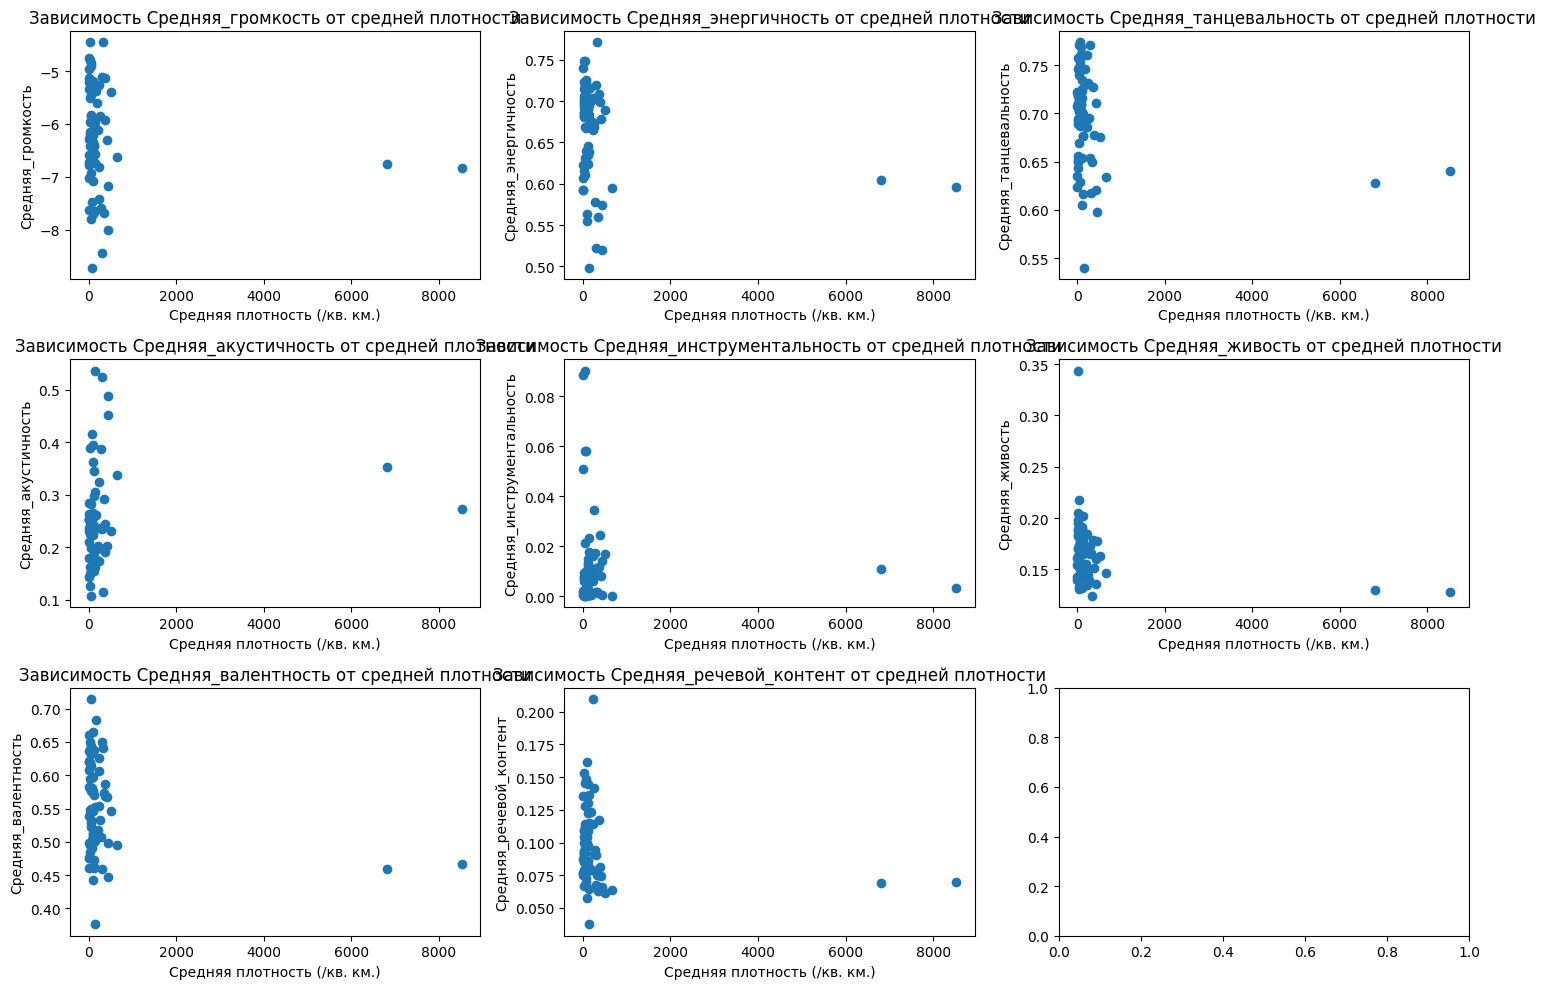

In [21]:

grouped_data = df.groupby('Страны').agg(
    Средняя_плотность=pd.NamedAgg(column='Плотность населения (/кв. км.)', aggfunc='mean'),
    Средняя_громкость=pd.NamedAgg(column='Громкость', aggfunc='mean'),
    Средняя_энергичность=pd.NamedAgg(column='Энергичность', aggfunc='mean'),
    Средняя_танцевальность=pd.NamedAgg(column='Танцевальность', aggfunc='mean'),
    Средняя_акустичность=pd.NamedAgg(column='Акустичность', aggfunc='mean'),
    Средняя_инструментальность=pd.NamedAgg(column='Инструментальность', aggfunc='mean'),
    Средняя_живость=pd.NamedAgg(column='Живость', aggfunc='mean'),
    Средняя_валентность=pd.NamedAgg(column='Валентность', aggfunc='mean'),
    Средняя_речевой_контент=pd.NamedAgg(column='Речевой контент', aggfunc='mean')
)


fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

features = ['Средняя_громкость', 'Средняя_энергичность', 'Средняя_танцевальность', 'Средняя_акустичность', 
            'Средняя_инструментальность', 'Средняя_живость', 'Средняя_валентность', 'Средняя_речевой_контент']

for i, feature in enumerate(features):
    axs[i].scatter(grouped_data['Средняя_плотность'], grouped_data[feature])
    axs[i].set_title(f'Зависимость {feature} от средней плотности')
    axs[i].set_xlabel('Средняя плотность (/кв. км.)')
    axs[i].set_ylabel(feature)

plt.tight_layout()
plt.show()



Видим, что при построении графиков для анализа появляется 2 выброса(крайне высокая плотность населения). Устраним ее, ограничив значения средней плотности:

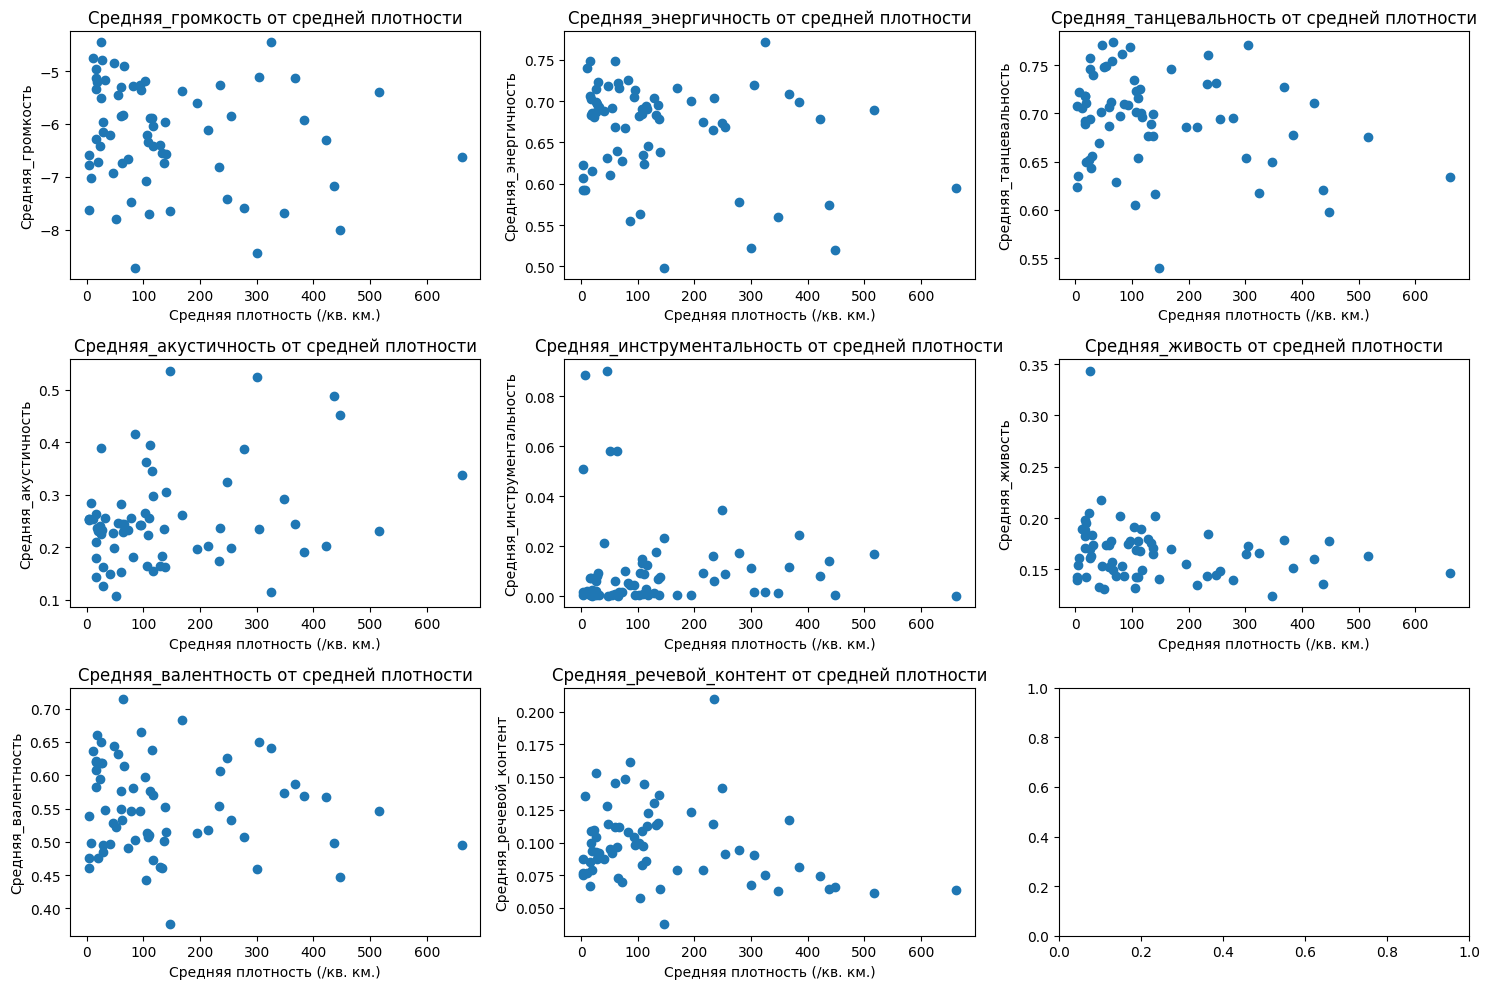

In [25]:

grouped_data = df.groupby('Страны').agg(
    Средняя_плотность=pd.NamedAgg(column='Плотность населения (/кв. км.)', aggfunc='mean'),
    Средняя_громкость=pd.NamedAgg(column='Громкость', aggfunc='mean'),
    Средняя_энергичность=pd.NamedAgg(column='Энергичность', aggfunc='mean'),
    Средняя_танцевальность=pd.NamedAgg(column='Танцевальность', aggfunc='mean'),
    Средняя_акустичность=pd.NamedAgg(column='Акустичность', aggfunc='mean'),
    Средняя_инструментальность=pd.NamedAgg(column='Инструментальность', aggfunc='mean'),
    Средняя_живость=pd.NamedAgg(column='Живость', aggfunc='mean'),
    Средняя_валентность=pd.NamedAgg(column='Валентность', aggfunc='mean'),
    Средняя_речевой_контент=pd.NamedAgg(column='Речевой контент', aggfunc='mean')
)

filtered_data = grouped_data[(grouped_data['Средняя_плотность'] > 0) & (grouped_data['Средняя_плотность'] <= 2000)]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

features = ['Средняя_громкость', 'Средняя_энергичность', 'Средняя_танцевальность', 'Средняя_акустичность', 
            'Средняя_инструментальность', 'Средняя_живость', 'Средняя_валентность', 'Средняя_речевой_контент']

for i, feature in enumerate(features):
    axs[i].scatter(filtered_data['Средняя_плотность'], filtered_data[feature])
    axs[i].set_title(f'{feature} от средней плотности')
    axs[i].set_xlabel('Средняя плотность (/кв. км.)')
    axs[i].set_ylabel(feature)

plt.tight_layout()
plt.show()



Видим, что практически на всех графиках получается так, что при увеличении средней плотности населения наша гипотеза не всегда соблюдается. Это видно на примере энергичности, на примере средней валентности, среднего речевого контента и т.д. Скорее наблюдается обратная зависимость, но она будет доказана позже.

#### Гипотеза 5: Чем в стране больше дождей(кол-во осадков), тем больше минорных треков в топ-50 плейлисте.

In [26]:
import pandas as pd

df['is_minor'] = df['Мажорность/минорность'] == 'Minor'

grouped_data = df.groupby('Страны').agg(
    Средние_осадки=pd.NamedAgg(column='Осадки (год.)', aggfunc='mean'),
    Доля_минорных_треков=pd.NamedAgg(column='is_minor', aggfunc='mean')
)

correlation = grouped_data['Средние_осадки'].corr(grouped_data['Доля_минорных_треков'])

print(f"Корреляция между количеством осадков и долей минорных треков: {correlation}")


Корреляция между количеством осадков и долей минорных треков: -0.2543557863219581


Здесь в дальнейшем будет построена линейная регрессионная модель, где где зависимая переменная — доля минорных треков, а независимая — количество осадков. Это позволит оценить влияние осадков на музыкальные предпочтения на уровне стран. если данные будут разделены на категории по уровню осадков (низкий, средний, высокий), чтобы оценить статистические различия между группами мы будем использовать t-тест и в зависимости от этого сделаем выводы.

#### Гипотеза 6: Чем ниже ср.температура в стране тем меньше в песнях слов(речевого контента)

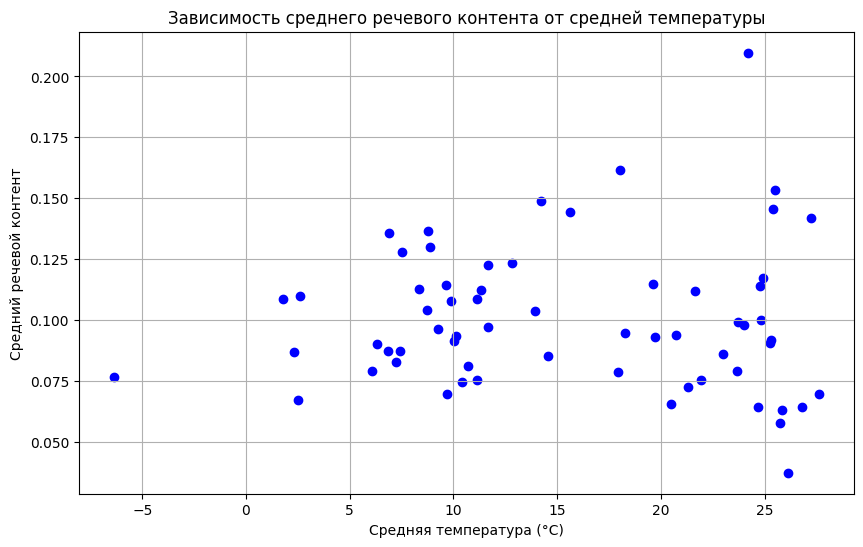

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [27]:


analysis_data = df.groupby('Страны').agg(
    Средняя_температура=pd.NamedAgg(column='Температура (ср. годовая)', aggfunc='mean'),
    Средний_речевой_контент=pd.NamedAgg(column='Речевой контент', aggfunc='mean')
).reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(analysis_data['Средняя_температура'], analysis_data['Средний_речевой_контент'], color='blue')
plt.title('Зависимость среднего речевого контента от средней температуры')
plt.xlabel('Средняя температура (°C)')
plt.ylabel('Средний речевой контент')
plt.grid(True)
plt.show()


correlation = analysis_data['Средняя_температура'].corr(analysis_data['Средний_речевой_контент'], method='pearson')


from sklearn.linear_model import LinearRegression

X = analysis_data[['Средняя_температура']]
y = analysis_data['Средний_речевой_контент']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Фактические данные')
plt.plot(X, model.predict(X), color='red', label='Линия регрессии: y = {:.2f}x + {:.2f}'.format(slope, intercept))
plt.title('Линейная регрессия и зависимость среднего речевого контента от средней температуры')
plt.xlabel('Средняя температура (°C)')
plt.ylabel('Средний речевой контент')
plt.legend()
plt.grid(True)
plt.show()


correlation, slope, intercept


К сожалению, здесь была попытка осуществить короткую регрессионную модель до дедлайна, и штурм бастилии не удался :( Но в ближайшем будущем мы обязательно доведем этот код до ума!